#      Employee Attrition

In [1]:
#Importing all the libraries used in the code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib notebook
from sklearn import linear_model,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [18]:
df = df.drop(["EmployeeCount", "StandardHours",'Over18','EmployeeNumber'], axis=1)   
#We removed these variables from the data beforehand as they were single value variables without
#any variation for all the employees, hence unimportant for predicting employee attrition.

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [3]:
#To check if there are any missing values in this data
df.isnull().sum()     

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [7]:
#To directly convert Categorical data to Numerical data

df['BusinessTravel'] =df['BusinessTravel'].astype('category').cat.codes   
df['Department'] =df['Department'].astype('category').cat.codes 
df['Gender'] =df['Gender'].astype('category').cat.codes       
df['JobRole'] =df['JobRole'].astype('category').cat.codes       
df['MaritalStatus'] =df['MaritalStatus'].astype('category').cat.codes   
df['OverTime'] =df['OverTime'].astype('category').cat.codes         
df['EducationField'] =df['EducationField'].astype('category').cat.codes  

# CORRELATION HEATMAP

<IPython.core.display.Javascript object>


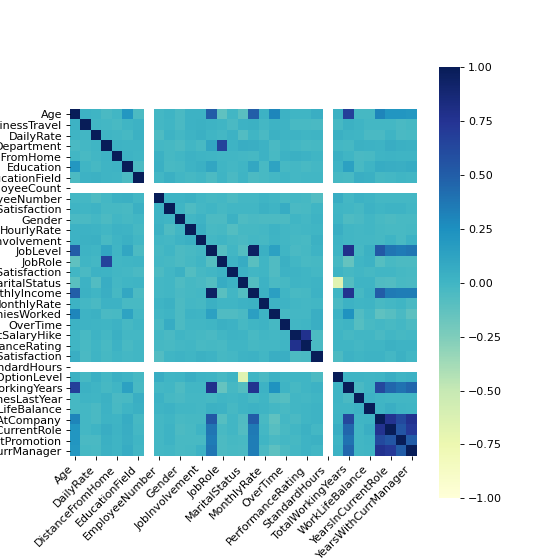

In [11]:
# Correlation Heatmap to check if the variables are correlated and if they are, we would avoid those in model building process.

plt.figure(figsize=(7,7))
cor = df.corr()

ax = sns.heatmap(cor, vmin=-1, vmax=1, center=0,cmap='YlGnBu',square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

Using the correlation heatmap analysis, we found certain variables which were strongly correlated(i.e correlation value > 0.7) with each other and hence dropped one of them.

The following were the strong correlations that we found in this data.
1. Monthly income,Job level and total working years
2. YearsinCurrentRole and YearsWithCurrManager

<IPython.core.display.Javascript object>


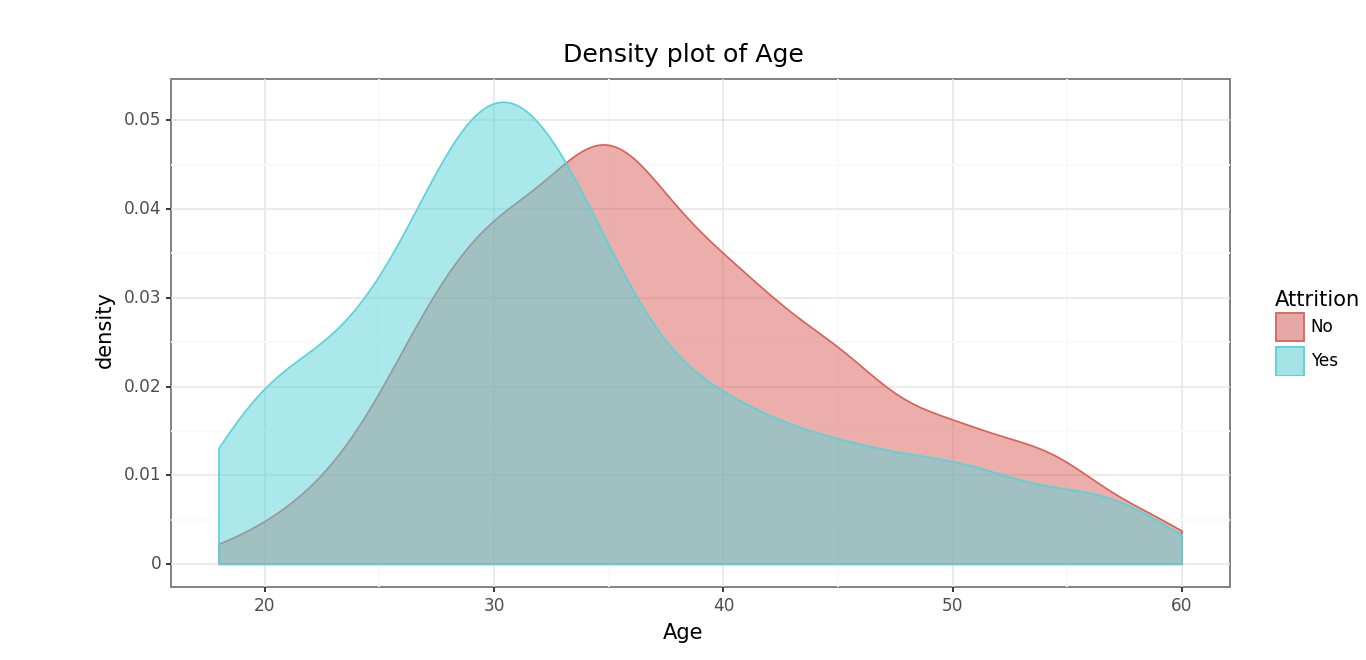

<ggplot: (99058535289)>

In [6]:
(
    ggplot(df, aes(x='Age', fill='Attrition', color='Attrition')) 
    + geom_density(position="identity", alpha=0.5) 
    + theme_bw() 
    + ggtitle("Density plot of Age") 
    + labs(x = "Age") 
)

<IPython.core.display.Javascript object>


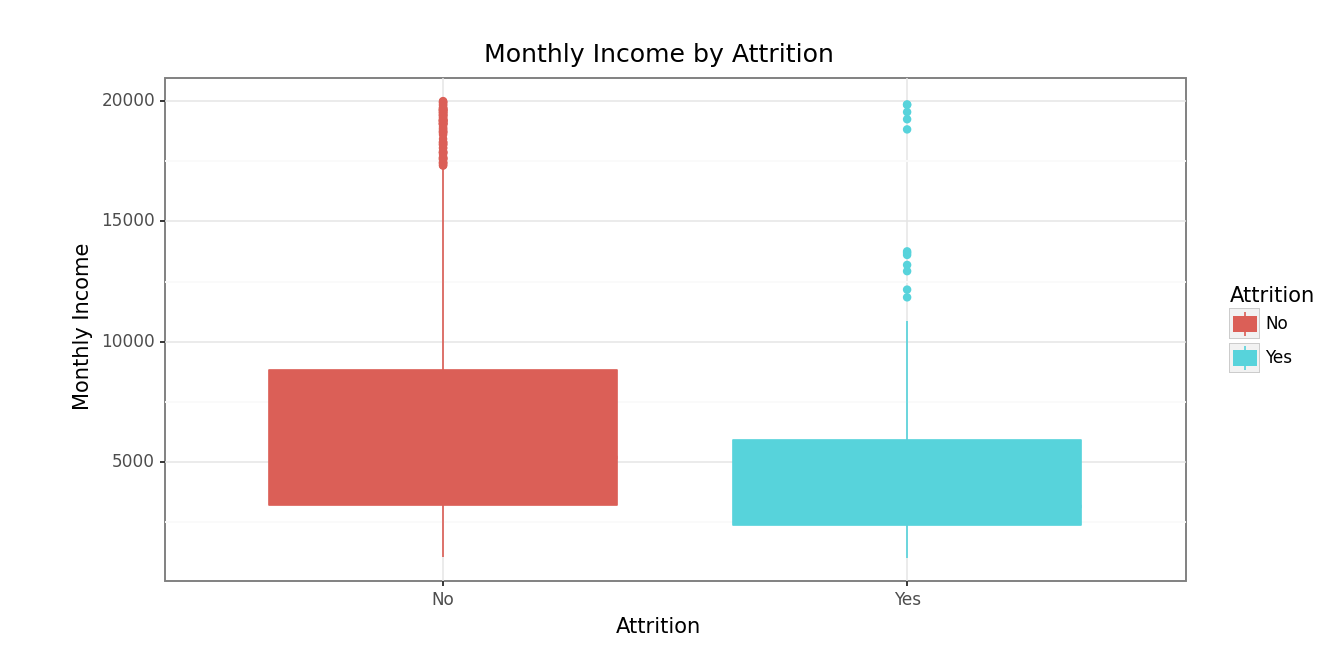

<ggplot: (99058514682)>

In [7]:
(
ggplot(df, aes(x='Attrition', y='MonthlyIncome', color='Attrition', fill='Attrition')) +
  geom_boxplot() + 
  theme_bw() + 
  ggtitle("Monthly Income by Attrition") + 
  labs(x = "Attrition", y = "Monthly Income")
)

<IPython.core.display.Javascript object>


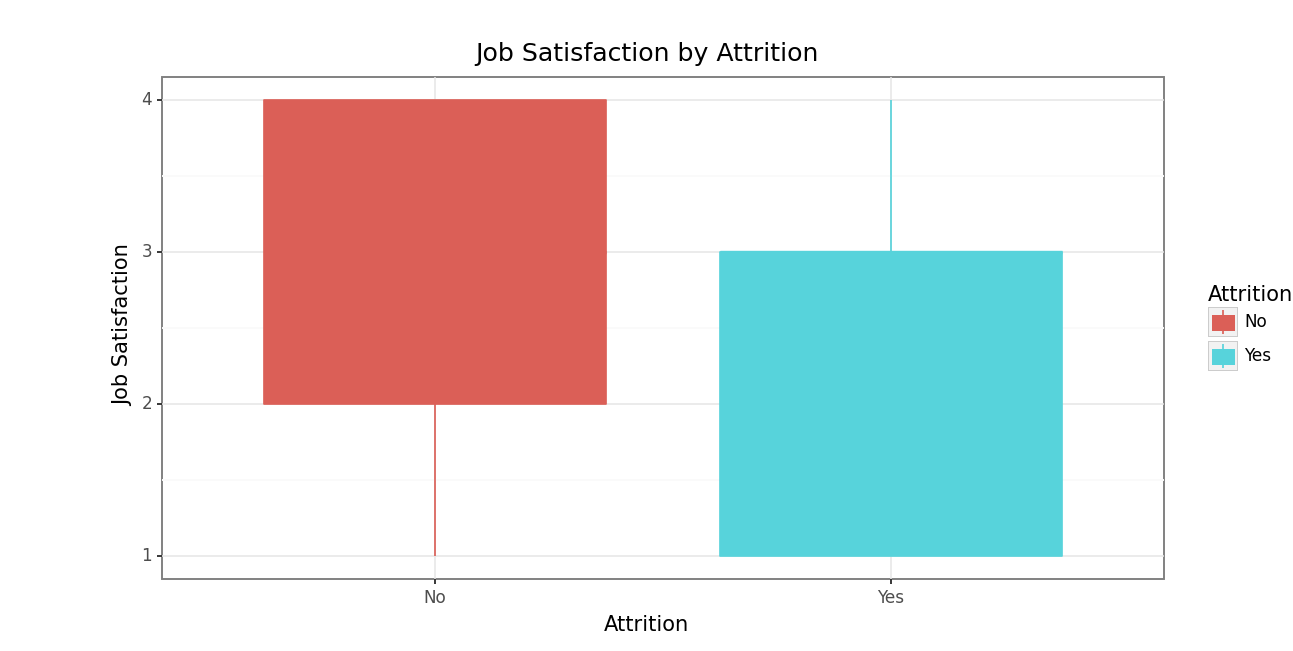

<ggplot: (99058539406)>

In [8]:
(
ggplot(df, aes(x='Attrition', y='JobSatisfaction', color='Attrition', fill='Attrition')) +
  geom_boxplot() + 
  theme_bw() + 
  ggtitle("Job Satisfaction by Attrition") + 
  labs(x = "Attrition", y = "Job Satisfaction")
)

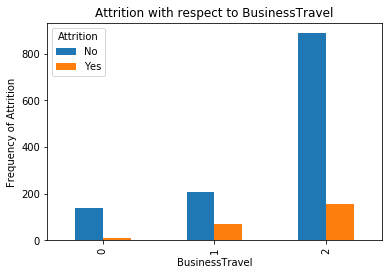

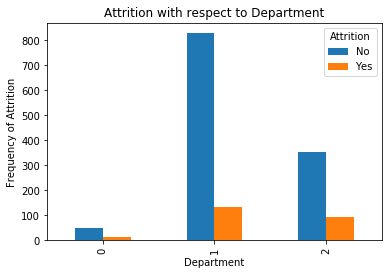

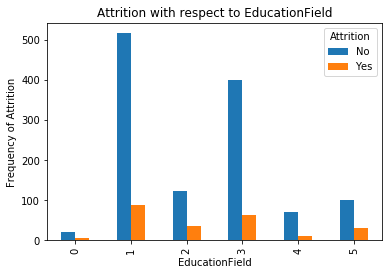

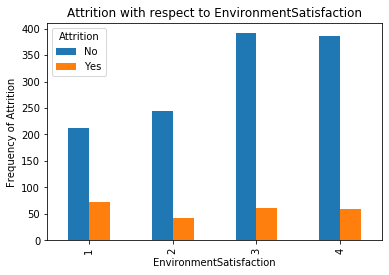

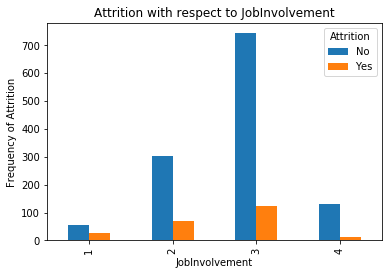

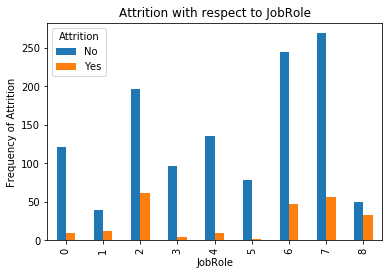

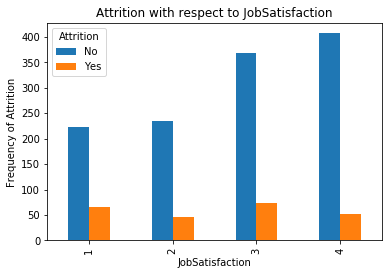

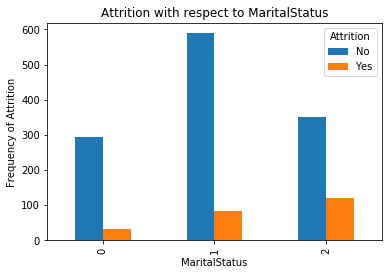

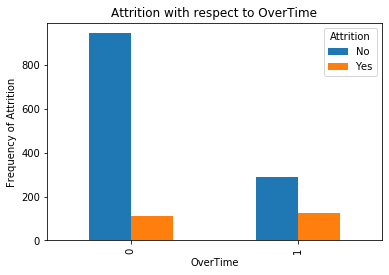

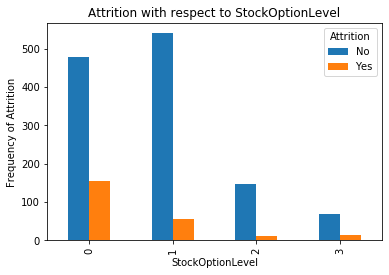

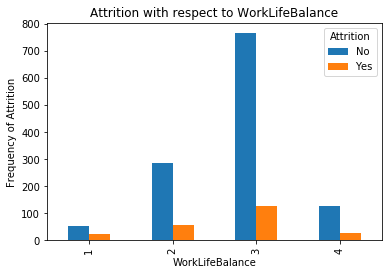

In [10]:
# Plots for Categorical data visualisation

dfplot = ['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance']
d=df[dfplot]
for x in dfplot:
    pd.crosstab(d[x], df.Attrition).plot(kind='bar')
    plt.title('Attrition with respect to '+x)
    plt.xlabel(x)
    plt.ylabel('Frequency of Attrition')

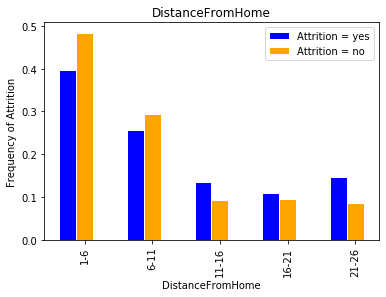

In [11]:
#function to generate frequency data for continuous value columns

dat1 = df.sort_values(by=['Attrition'])
for i in range(dat1.shape[0]):
    if dat1['Attrition'].values[i] == 'Yes':
        a = i
        break
        
dat2 = np.split(dat1,[a],axis=0)

dat_n = dat2[0]
dat_y = dat2[1]

def binn(data,B,n):            
    h = (np.amax(df[B].values)-np.amin(df[B].values))//n
    L1 = []
    L = []
    for j in range(n):
        c = 0
        a = str(np.amin(df[B].values)+j*h)+'-'+str(np.amin(df[B].values)+(j+1)*h)
        L.append(a)     #contains Categories 
        for i in range(data.shape[0]):
            if np.amin(df[B].values) + j*h <= data[B].values[i] <= np.amin(df[B].values) + (j+1)*h:
                c = c + 1
        L1.append(c/data.shape[0])
    return L1,L

#function to make barplots for a given data

def barplot(A,B,C,D):   #A/B = yes/no data , C = Categories  :function to generate barplot
    barWidth = 0.25
    r1 = np.arange(len(C))
    r2 = [x + barWidth for x in r1]
    plt.bar(r1, A, color='b', width=barWidth, edgecolor='white', label='Attrition = yes')
    plt.bar(r2, B, color='orange', width=barWidth, edgecolor='white', label='Attrition = no')
    plt.xticks([r + barWidth for r in range(len(W))], C)
    plt.xlabel(str(D))
    plt.ylabel('Frequency of Attrition')
    plt.title(D)
    plt.legend()
    plt.xticks( rotation='vertical')
    plt.show()
    
categ = 'DistanceFromHome'

W,L = binn(dat_y,categ,5)	
W1,L1 = binn(dat_n,categ,5)

barplot(W,W1,L,categ)

#People who live further away from their work show higher proportion of leavers compared to their counterparts

**People who live further away from their work show higher proportion of leavers compared to their counterparts**

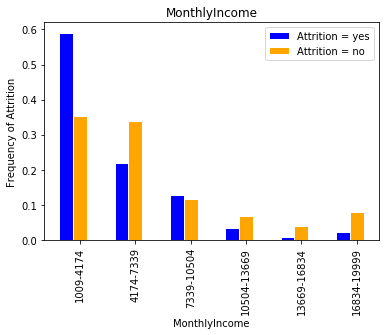

In [12]:
categ = 'MonthlyIncome'

W,L = binn(dat_y,categ,6)	
W1,L1 = binn(dat_n,categ,6)

barplot(W,W1,L,categ)



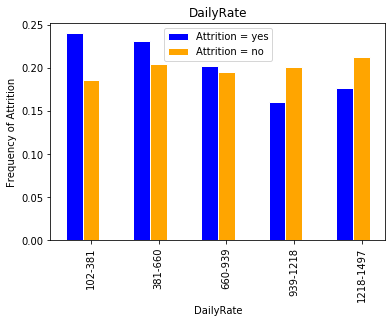

In [13]:
categ = 'DailyRate'

W,L = binn(dat_y,categ,5)	
W1,L1 = binn(dat_n,categ,5)

barplot(W,W1,L,categ)

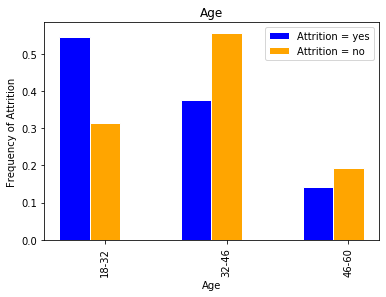

In [14]:
categ = 'Age'

W,L = binn(dat_y,categ,3)	
W1,L1 = binn(dat_n,categ,3)

barplot(W,W1,L,categ)

#Younger people seem to leave the company more often.

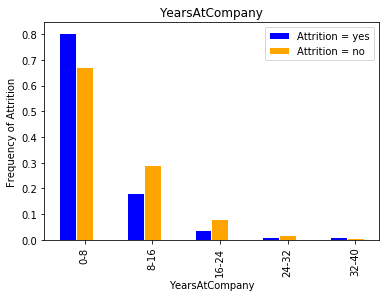

In [15]:
categ = 'YearsAtCompany'

W,L = binn(dat_y,categ,5)
W1,L1 = binn(dat_n,categ,5)

barplot(W,W1,L,categ)

#It seems that more is the number of years person has worked at the company, lesser is the attrition rate.

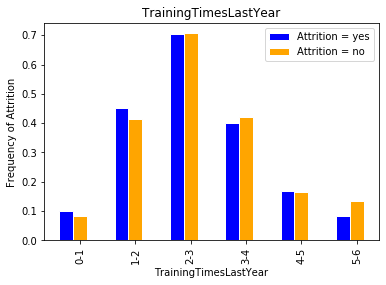

In [16]:
categ = 'TrainingTimesLastYear'

W,L = binn(dat_y,categ,6)
W1,L1 = binn(dat_n,categ,6)

barplot(W,W1,L,categ)

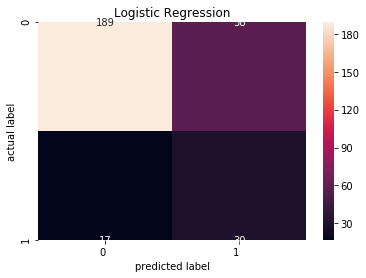

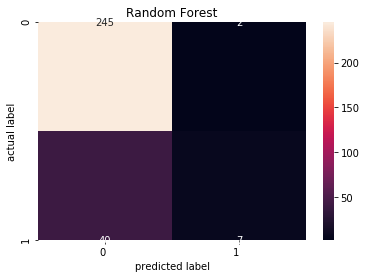

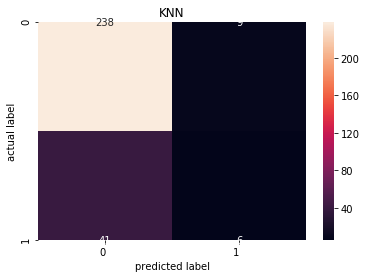

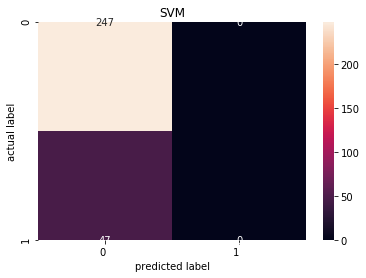

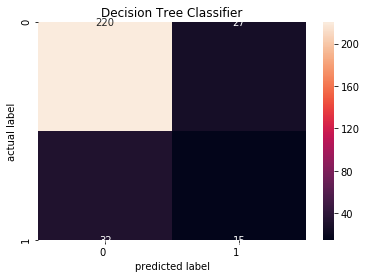

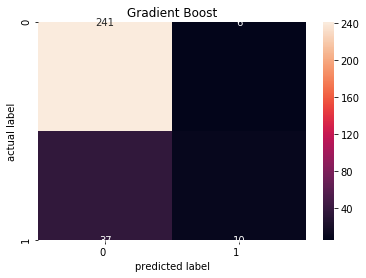

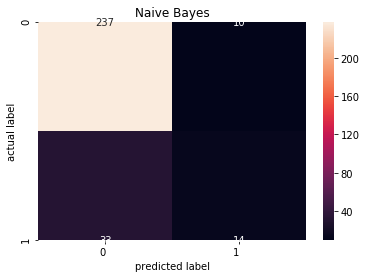

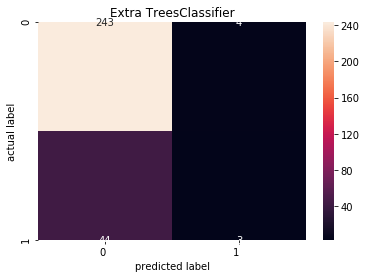

In [17]:

#After removing one of the strongly correlated variables, we get the following dataframe

df2 = df[['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField',
          'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
          'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TrainingTimesLastYear','WorkLifeBalance', 
          'YearsAtCompany','YearsSinceLastPromotion']] #new dataframe with the selected attributes relevant for employee attrition 

dftitle=['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField',
          'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
          'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
         'YearsAtCompany','YearsSinceLastPromotion']
df['Attrition'] =df['Attrition'].astype('category').cat.codes   #coverting yes and no attrition data to 0' and 1's

target = df['Attrition'].copy()    

names = []
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=40, random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto', random_state=0)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=0)))
models.append(('Gradient Boost', GradientBoostingClassifier(learning_rate=0.1, random_state=0)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Extra TreesClassifier', ExtraTreesClassifier()))

col = ['Algorithm', 'Accuracy', 'Precision', 'F1_score', 'ROC_AUC']
df_results = pd.DataFrame(columns=col)
i = 0

#80-20 splitting where 80% Data is for Training the Model and 20% Data is for Validation and Performance Analysis
X_train, X_test, y_train, y_test = train_test_split(df2,target,test_size=0.20,random_state=0,stratify=target)

res = {}
clf = RandomForestClassifier(n_estimators=10000,random_state=0)
clf.fit(X_train, y_train)
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    prec_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')    
    f1_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_weighted')
    roc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    model.fit(X_train,y_train)           #Training the model
    y_pred = model.predict(X_test)
    A = confusion_matrix(y_test, y_pred)               #plotting the confusion matrix
    ax = sns.heatmap(A,annot=True, fmt="d")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0,horizontalalignment='right')
    plt.title(str(name))
    plt.xlabel('predicted label')
    plt.ylabel('actual label')
    plt.show()
    
    names.append(name)
    df_results.loc[i] = [name, round(np.mean(acc_results), 7), round(np.mean(prec_results), 7),
                         round(np.mean(f1_results), 7), round(np.mean(roc_results), 7),]    
    i += 1
L1 = []
L1a = []
for feature in zip(dftitle, clf.feature_importances_): #Calculating the importances of each feature for RandomForestClassifier model
    L1.append(feature[0])
    L1a.append(feature[1])
feature = pd.DataFrame(list(zip(L1,L1a)),columns =['Feature','Value'])
feature = feature.sort_values(by=['Value'],ascending=False)


In [13]:
#Comparision of the different models
df_results    


,Algorithm,Accuracy,Precision,F1_score,ROC_AUC
0,Logistic Regression,0.730429,0.339526,0.762103,0.780265
1,Random Forest,0.855447,0.721245,0.821370,0.798750
2,KNN,0.820614,0.347222,0.777771,0.578950
3,SVM,0.838469,0.000000,0.764931,0.505668
4,Decision Tree Classifier,0.786600,0.354741,0.790100,0.622236
5,Gradient Boost,0.864798,0.650618,0.846141,0.792071
6,Naive Bayes,0.855447,0.611652,0.839172,0.777233
7,Extra TreesClassifier,0.852086,0.534087,0.820151,0.744347


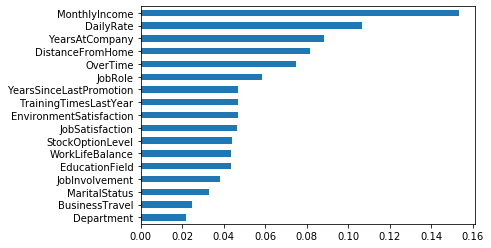

In [16]:
feat_importances = pd.Series(clf.feature_importances_, index=df2.columns) 
feat_importances = feat_importances.nsmallest(20)
feat_importances.plot(kind='barh')

#According to RandomForestClassifier model, it seems like monthly income contributes the most in Attrition of employees.

In [18]:
#Hyperparameter tuning for logistic regression

param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', class_weight="balanced", random_state=0),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_


print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)


best params: LogisticRegression(C=1.2509999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.2509999999999997}
best score: 0.7873298434043409


In [ ]:
#Hyperparameter tuning for random forest classifier

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_


print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)

#The random forest classifier works quite well even with the default parameters with an accuracy of 0.85.
#Still, we tried to improve by tuning hyper parameters of Random Forest classifier. 
#Also, it doesn’t over fit easily because of its randomness feature.

In [ ]:
#checking the LogisticRegression model accuracy after hyperparameter tuning

logistic_regression = LogisticRegression(C=1.8709999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
kfold = model_selection.KFold(n_splits=10, random_state=0)
acc_results = model_selection.cross_val_score(logistic_regression, X_train, y_train, cv=kfold, scoring='accuracy')
print(np.mean(acc_results))

In [ ]:
#checking the RandomForestClassifier model accuracy after hyperparameter tuning

rf_clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
kfold = model_selection.KFold(n_splits=10, random_state=0)
acc_results = model_selection.cross_val_score(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy')
print(np.mean(acc_results))

In [32]:
#IMPORT FEATURE for the trained RandomForestClassifier model

df2 = df[['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField',
          'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
          'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TrainingTimesLastYear',
          'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'0]] 

rf1 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)
X1_train = df2
y1_train = df['Attrition']
rf1.fit(X1_train,y1_train)
rf1

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=7, verbose=0, warm_start=False)

In [45]:
def randomforest():        #this function can now be used to predict employee attrition for any input data file effectively
    datafile = input()
    df=pd.read_csv(datafile)
    df.drop(['Attrition'],axis=1)
    for col_name in df.columns:
        if(df[col_name].dtype == 'object'):
            df[col_name]= df[col_name].astype('category')
            df[col_name] = df[col_name].cat.codes
    df2 = df[['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField',
          'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
          'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TrainingTimesLastYear',
          'WorkLifeBalance', 'YearsAtCompany']]
    return(df2)
a = randomforest()
b = list(rf1[1].predict(a))

for i in range(len(b)):
    if b[i]==1.0:
        b[i]='YES'
    else:
        b[i]='NO'
        
print(len(b))
num=list(df['EmployeeNumber'])
newdf = pd.DataFrame(list(zip(num, b)), 
               columns =['EmployeeNumber', 'Attrition']) 
newdf  

#This is the result of the prediction using our RANDOMFORESTCLASSIFIER model specifying
#whether an employee will leave the company or not.

WA_Fn-UseC_-HR-Employee-Attrition.csv
1470


,EmployeeNumber,Attrition
0,1,NO
1,2,NO
2,4,YES
3,5,NO
4,7,YES
...,...,...
1465,2061,NO
1466,2062,NO
1467,2064,NO
1468,2065,NO
